In [2]:
import os, sys

# 1) See where we are running
print("CWD:", os.getcwd())

# 2) Add the parent folder to Python’s import path
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
print("Adding to sys.path:", repo_root)
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

# Now imports from models/ will work
from models.fx_sde import FXSimulator
print("Import succeeded!")


CWD: /Users/Igor/Documents/GitHub/rough_lsv_fx/notebooks
Adding to sys.path: /Users/Igor/Documents/GitHub/rough_lsv_fx
Import succeeded!


# Notebook 01 – Simulating FX Spot Paths (Garman–Kohlhagen Model)

This notebook simulates FX spot paths using the Garman–Kohlhagen model, which is the foreign exchange version of Black–Scholes.

We assume constant volatility and flat interest rates (domestic and foreign). This is our initial prototype with all logic written inline.

Later, we will:
- Refactor it into a reusable module
- Move the simulation logic into a Python class
- Extend the model with stochastic rates and volatility


## Model Overview

We simulate spot FX paths under the following SDE (Garman–Kohlhagen):

$$
dS(t) = (r_d - r_f) S(t)\,dt + \sigma S(t)\,dW_d^Q(t)
$$
Its solution:
$$
S(t) = S(0)\cdot \exp\left[\left((r_d - r_f) - \frac{1}{2} \sigma^2 \right)\,t + \sigma\, W^Q_d(t)     \right]
$$

Where:
- $S(t)$ is the spot FX rate
- $r_d$ is the domestic interest rate (e.g. USD)
- $r_f$ is the foreign interest rate (e.g. EUR)
- $\sigma$ is volatility
- $dW_d^Q(t)$ is the Brownian motion under the domestic risk-neutral measure

## Refactored to use FXSimulator class  
We’ve moved the simulation logic into `models/fx_sde.py` and now simply import and call the class below.

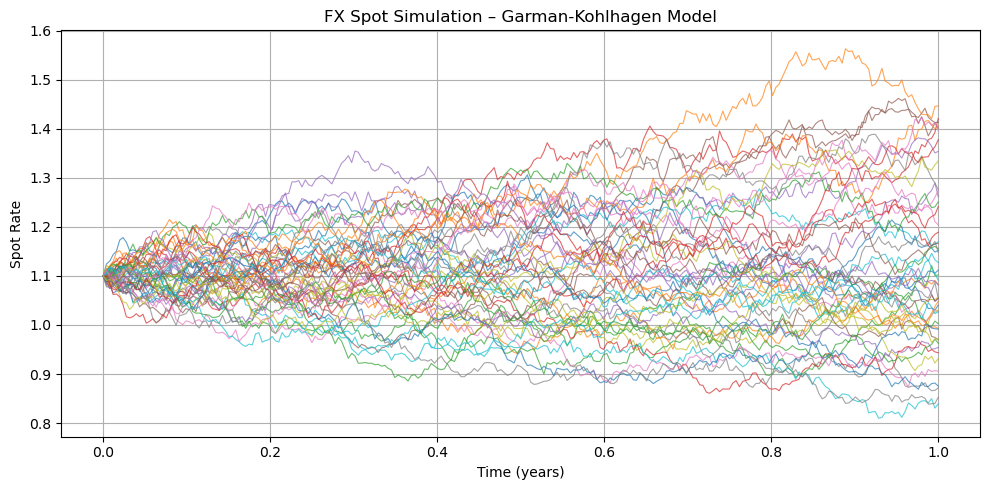

In [5]:
from models.fx_sde import FXSimulator
import matplotlib.pyplot as plt

# 1) Instantiate the simulator with your parameters
sim = FXSimulator(
    S_0 = 1.10,      # Initial spot rate
    r_dom = 0.03,   # Domestic interest rate
    r_for = 0.01,   # Foreign interest rate
    sigma = 0.15,   # Volatility
    T = 1.0,        # Maturity (years)
    n_steps = 252,  # Time steps
    n_paths = 50,   # Number of Monte Carlo paths
    seed = 55       # RNG seed
)

# 2) Generate the paths
paths = sim.generate_paths()

# 3) Plot the first 10 simulated spot paths
sim.plot_paths(n_plot=50)

## Summary

- We moved our FX spot path logic into a reusable `FXSimulator` class in `models/fx_sde.py`.  
- The notebook now simply imports `FXSimulator`, calls `generate_paths()`, and uses `plot_paths()` to visualize.  
- This modular design makes the code cleaner, easier to extend (e.g. add stochastic rates or rough volatility), and mirrors production‑style quant libraries.

**Next steps:**
1. Extend `FXSimulator` with stochastic short‑rate (Hull–White) support.  
2. Add local-vol or rough‑vol hooks.  
3. Begin `02_payoffs.ipynb` for Monte Carlo option pricing.  